### Importing the data and the functions

In [1]:
include("importData.jl")
include("DDEmodel.jl")
include("Hill.jl")
include("ODEmodel.jl")
include("plot.jl")

# import data from the path

# population data, g2 data, g1 data, initial number of cells in g1, initial number of cells in g2
# lapatinib
conc_l, pop_l, g2_l, g1_l, g1_0_l, g2_0_l = setup_data("lapatinib");

# # doxorubicin
# conc_d, pop_d, g2_d, g1_d, g1_0_d, g2_0_d = setup_data("doxorubicin");

# # gemcitabine
# conc_g, pop_g, g2_g, g1_g, g1_0_g, g2_0_g = setup_data("gemcitabine");

# # paclitaxel
# conc_t, pop_t, g2_t, g1_t, g1_0_t, g2_0_t = setup_data("paclitaxel");

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/dde/lapatinib/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/dde/lapatinib/DrugResponseModel.jl/src/importData.jl:37


### A) cartoon 

In [2]:
# will do in the Affinity designer of power point

### B) ODE fitting of Lapatinib data

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = ode_plotIt(::Array{Float64,1}, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}, ::DataFrame, ::Int64, ::String) at ODEmodel.jl:59
└ @ Main /home/farnazm/dde/lapatinib/DrugResponseModel.jl/src/ODEmodel.jl:59


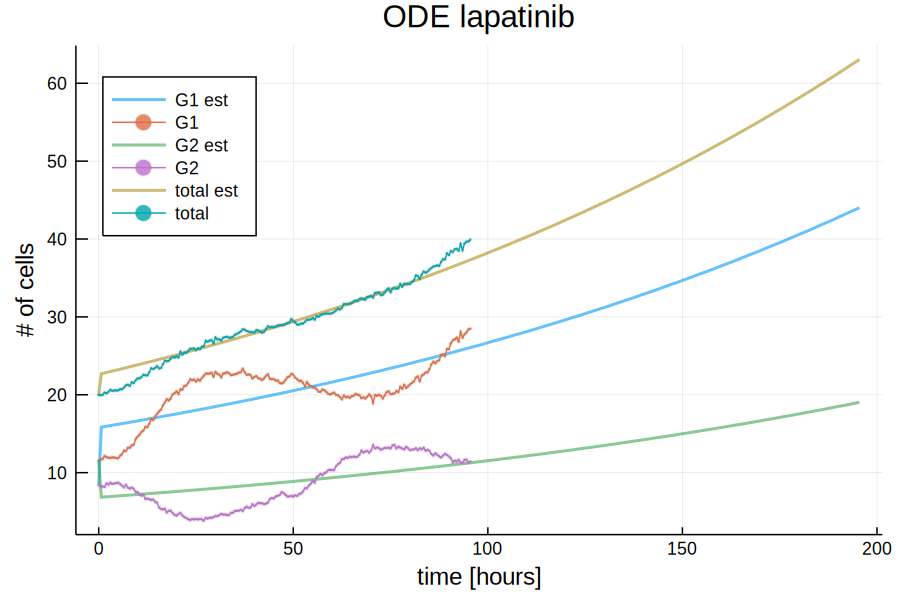

In [3]:
i = 6 # trial number

# initial values
p = [8.870525324, 8.492087169, 0.43447323, 7.67847790]

# setting lowest delay for tau1 to be half an hour and for tau2 to be 3 hours.
low = 0.05*ones(4)
upp = 20*ones(4)

# ODE optimization and estimation of the parameters
params_ode = ode_optimIt(p, low, upp, i, g1_l, g2_l, g1_0_l, g2_0_l)

# plotting the fitted curves
ode_plotIt(params_ode, g1_l, g2_l, g1_0_l, g2_0_l, pop_l, i, "ODE lapatinib")

### F) DDE fitting for lapatinib

In [4]:
# initial guess
initial_guess  = [0.02798, 0.025502, 15.3481, 15.2881, 0.001, 0.001]

# bounds 
lower_bnd = [-6.0, -6.0, 1.0, 1.0, -10.0, -10.0]
upper_bnd = [0.0, 0.0, 6.0, 6.0, 0.0, 0.0]

# max number of steps
maxSteps = 1e4
parameters = zeros(6,8)
for j in 1:8
    println("#################### trial number $j #########################")
    best_fit, parameters[:,j] = optimization(g1_l, g2_l, g1_0_l, g2_0_l, initial_guess, j, lower_bnd, upper_bnd, maxSteps)
end



#################### trial number 1 #########################
blackbox optim begins ...
Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 42.92 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 233.00
Function evals per second = 235.54
Improvements/step = 0.19100
Total function evaluations = 10110


Best candidate found: [-2.61389, -3.27933, 1.03278, 1.01576, -7.71948, -4.28533]

Fitness: 1434.329542033

fitness before local optimization : 
1434.329542033297
local optimization begins
the fitness after local optimization : 
1389.2269451756724
#################### trial number 2 #########################
blackbox optim begins ...
Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},Ran

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}, ::DataFrame, ::Int64, ::String, ::Bool) at plot.jl:32
└ @ Main /home/farnazm/dde/lapatinib/DrugResponseModel.jl/src/plot.jl:32
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}, ::DataFrame, ::Int64, ::String, ::Symbol) at plot.jl:32
└ @ Main /home/farnazm/dde/lapatinib/DrugResponseModel.jl/src/plot.jl:32


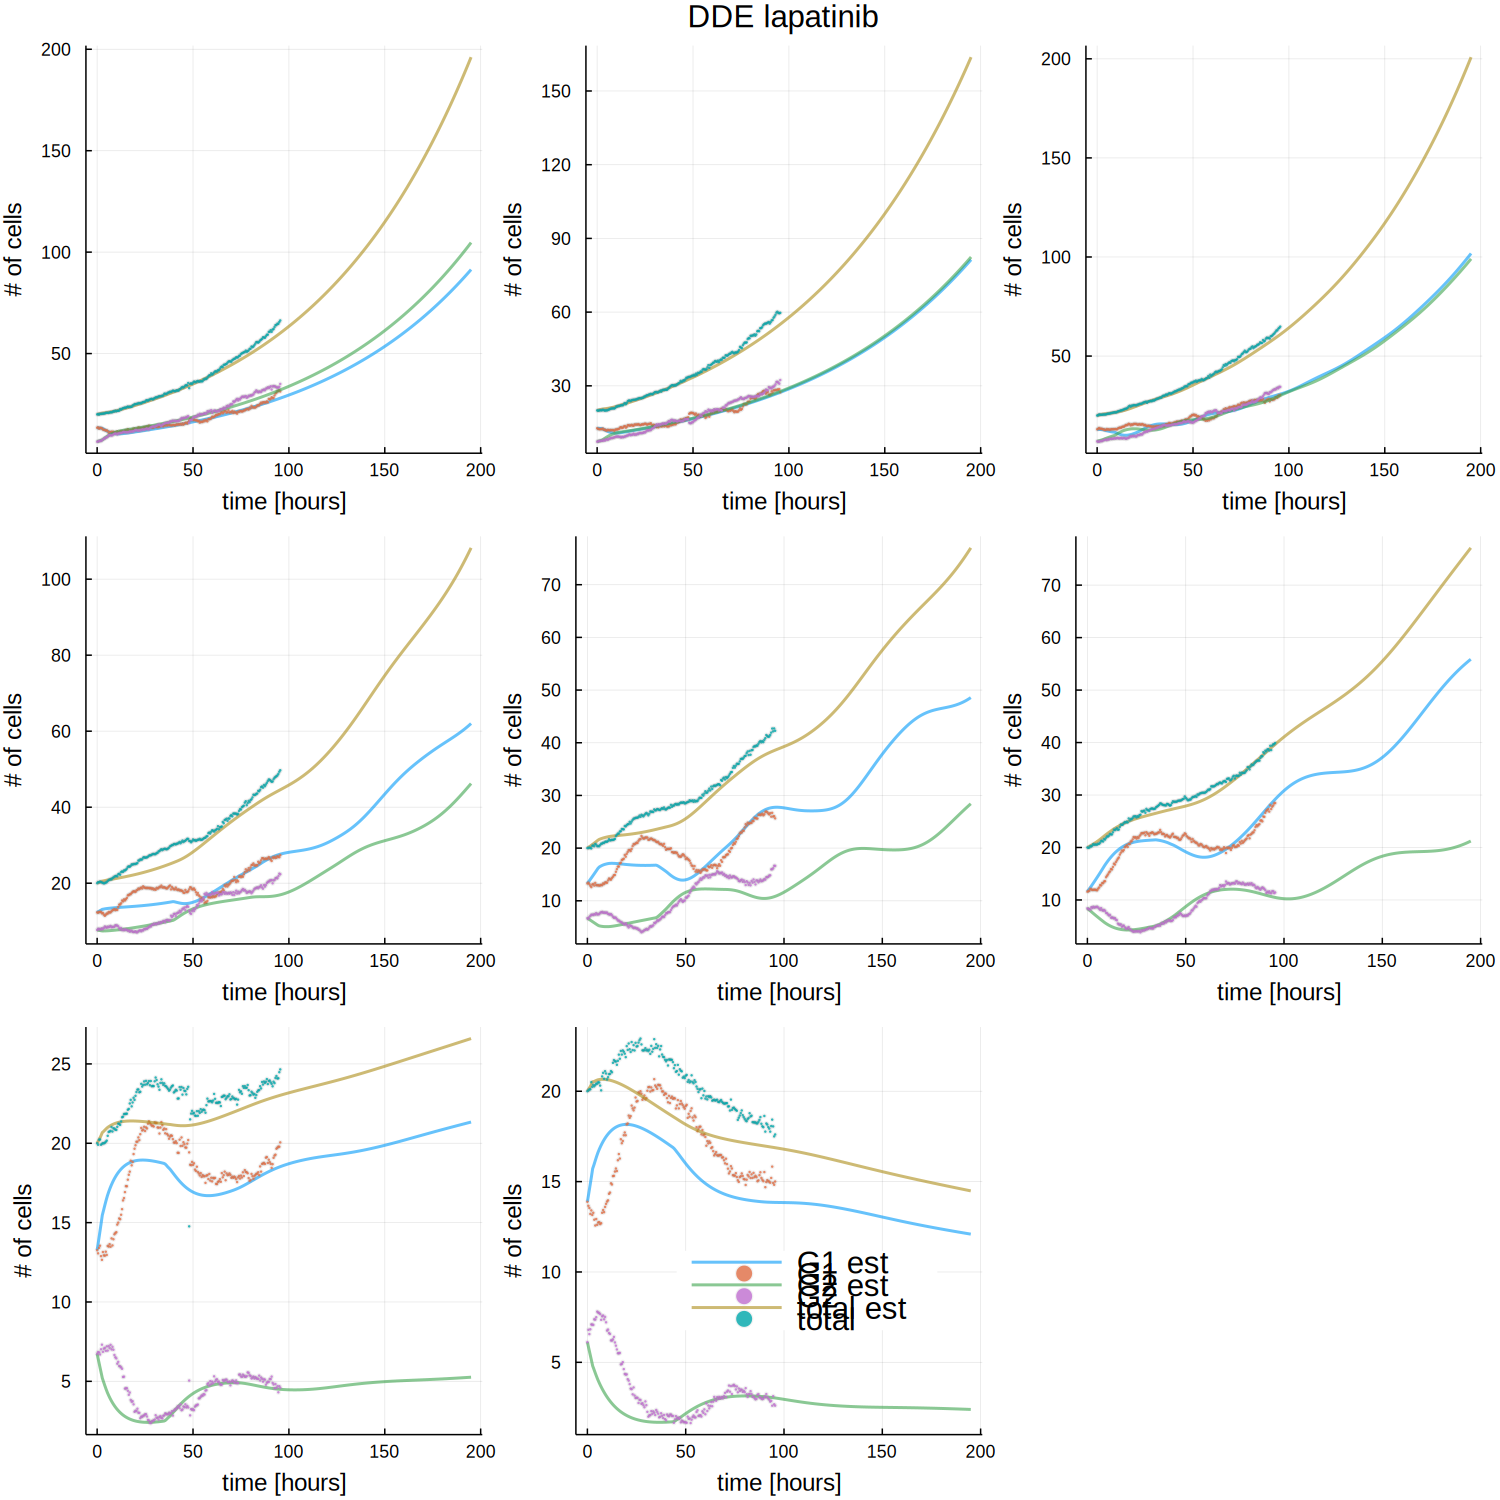

In [5]:
include("plot.jl")
# i showas the trial number, which could be from 1:control, ..., 8: maximum drug concentraation
p1 = plotIt(parameters[:, 1], g1_l, g2_l, g2_0_l, g1_0_l, pop_l, 1, "", false)
p2 = plotIt(parameters[:, 2], g1_l, g2_l, g2_0_l, g1_0_l, pop_l, 2, "DDE lapatinib", false)
p3 = plotIt(parameters[:, 3], g1_l, g2_l, g2_0_l, g1_0_l, pop_l, 3, "", false)
p4 = plotIt(parameters[:, 4], g1_l, g2_l, g2_0_l, g1_0_l, pop_l, 4, "", false)
p5 = plotIt(parameters[:, 5], g1_l, g2_l, g2_0_l, g1_0_l, pop_l, 5, "", false)
p6 = plotIt(parameters[:, 6], g1_l, g2_l, g2_0_l, g1_0_l, pop_l, 6, "", false)
p7 = plotIt(parameters[:, 7], g1_l, g2_l, g2_0_l, g1_0_l, pop_l, 7, "", false)
p8 = plotIt(parameters[:, 8], g1_l, g2_l, g2_0_l, g1_0_l, pop_l, 8, "", :right)
plot(p1, p2, p3, p4, p5, p6, p7, p8)
plot!(size = (1000, 1000))

### G) DDE parameters for lapatinib

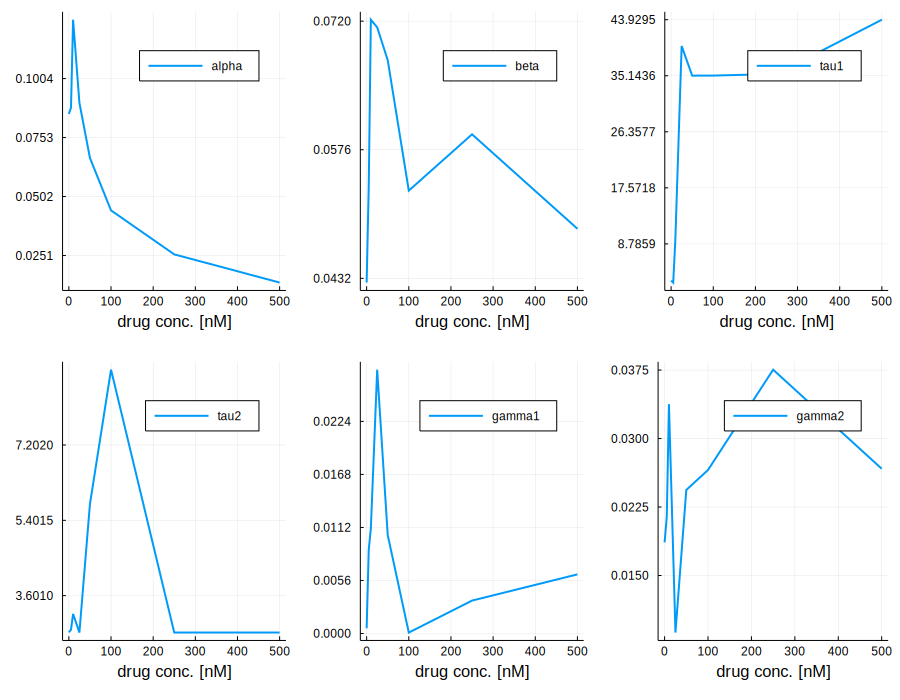

In [6]:

p1 = plot(conc_l, parameters[1,:], xlabel = "drug conc. [nM]", label="alpha", lw= 2.0,
    ylabel = "", yticks = 0.0:round(maximum(parameters[1,:])/5 ,digits = 4):maximum(parameters[1,:]))

p2 = plot(conc_l, parameters[2,:], xlabel = "drug conc. [nM]", label = "beta", lw= 2.0,
    ylabel = "", yticks = 0.0:round(maximum(parameters[2,:])/5 ,digits = 4):maximum(parameters[2,:]))

p3 = plot(conc_l, parameters[3,:], xlabel = "drug conc. [nM]", label="tau1", lw= 2.0,
    ylabel = "", yticks = 0.0:round(maximum(parameters[3,:])/5 ,digits = 4):maximum(parameters[3,:]))

p4 = plot(conc_l, parameters[4,:], xlabel = "drug conc. [nM]", label = "tau2", lw= 2.0,
    ylabel = "", yticks = 0.0:round(maximum(parameters[4,:])/5 ,digits = 4):maximum(parameters[4,:]))

p5 = plot(conc_l, parameters[5,:], xlabel = "drug conc. [nM]", label = "gamma1", lw= 2.0,
    ylabel = "", yticks = 0.0:round(maximum(parameters[5,:])/5 ,digits = 4):maximum(parameters[5,:]))

p6 = plot(conc_l, parameters[6,:], xlabel = "drug conc. [nM]", label = "gamma2", lw= 2.0,
    ylabel = "", yticks = 0.0:round(maximum(parameters[6,:])/5 ,digits = 4):maximum(parameters[6,:]))

plot(p1, p2, p3, p4, p5, p6, dpi = 100)
plot!(size = (900, 700))

### H) DDE Hill fitting 

In [ ]:
#  [EC50, b_steepness, alpha_min, alpha_max, beta_min, beta_max, tau1_mean, tau1_max, tau2_min, tau2_max, gamma1_max, gamma2_max]
# guess
guess = [125.0, 0.04, 0.007, 0.005, 0.007, 0.005, 30.0, 3.0, 20.0, 4.0, 0.003, 0.02]

# max num of steps
num_steps=1e3

# optimize and return the estimated hill parameters
best_fit, params = optimize_hill(guess, conc_l, g1_l, g2_l, g1_0_l, g2_0_l, num_steps)

# easy way to convert the hill parameters to DDE parameters
p = getDDEparams(params, conc_l)

global optimization begins ...
Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
50.02 secs, 370 evals, 282 steps, improv/step: 0.553 (last = 0.5532), fitness=869201.813394648
100.15 secs, 728 evals, 634 steps, improv/step: 0.585 (last = 0.6108), fitness=869200.935576742

Optimization stopped after 1001 steps and 150.27 seconds


In [ ]:
include("plot.jl")
# for instance we want to plot the data and estimated for some trial 
p1 = plotIt(p[:, 1], g1_l, g2_l, g2_0_l, g1_0_l, pop_l, 1, "", false)
p2 = plotIt(p[:, 2], g1_l, g2_l, g2_0_l, g1_0_l, pop_l, 2, "DDE lapatinib", false)
p3 = plotIt(p[:, 3], g1_l, g2_l, g2_0_l, g1_0_l, pop_l, 3, "", false)
p4 = plotIt(p[:, 4], g1_l, g2_l, g2_0_l, g1_0_l, pop_l, 4, "", false)
p5 = plotIt(p[:, 5], g1_l, g2_l, g2_0_l, g1_0_l, pop_l, 5, "", false)
p6 = plotIt(p[:, 6], g1_l, g2_l, g2_0_l, g1_0_l, pop_l, 6, "", false)
p7 = plotIt(p[:, 7], g1_l, g2_l, g2_0_l, g1_0_l, pop_l, 7, "", false)
p8 = plotIt(p[:, 8], g1_l, g2_l, g2_0_l, g1_0_l, pop_l, 8, "", :topleft)
plot(p1, p2, p3, p4, p5, p6, p7, p8, xaxis=(font=6))
plot!(size = (1000, 1000))
ylims!((0.0, 120.0))

### I) DDE Hill Parameters

In [ ]:
pp1 = plot(conc_l, p[1,:], xlabel = "drug conc. [nM]", label="", lw = 2.0, alpha = 0.6, marker = (:dot, 3, 0.7, :blue, stroke(0.1, 0.6, :black, :dot)),
    ylabel = "alpha", yticks = 0.0:round(maximum(p[1,:])/5 ,digits = 4):maximum(p[1,:]))

pp2 = plot(conc_l, p[2,:], xlabel = "drug conc. [nM]", label = "", lw = 2.0, alpha = 0.6, marker = (:dot, 3, 0.7, :blue, stroke(0.1, 0.6, :black, :dot)),
    ylabel = "beta", yticks = 0.0:round(maximum(p[2,:])/12 ,digits = 4):maximum(p[2,:]))

pp3 = plot(conc_l, p[3,:], xlabel = "drug conc. [nM]", label="", lw = 2.0, alpha = 0.6, marker = (:dot, 3, 0.7, :blue, stroke(0.1, 0.6, :black, :dot)),
    ylabel = "tau1", yticks = 0.0:round(maximum(p[3,:])/5 ,digits = 4):maximum(p[3,:]))

pp4 = plot(conc_l, p[4,:], xlabel = "drug conc. [nM]", label = "", lw = 2.0, alpha = 0.6, marker = (:dot, 3, 0.7, :blue, stroke(0.1, 0.6, :black, :dot)),
    ylabel = "tau2", yticks = 0.0:round(maximum(p[4,:])/8 ,digits = 4):maximum(p[4,:]))

pp5 = plot(conc_l, p[5,:], xlabel = "drug conc. [nM]", label = "", lw = 2.0, alpha = 0.6, marker = (:dot, 3, 0.7, :blue, stroke(0.1, 0.6, :black, :dot)),
    ylabel = "gamma1", yticks = 0.0:round(maximum(p[5,:])/5 ,digits = 4):maximum(p[5,:]))

pp6 = plot(conc_l, p[6,:], xlabel = "drug conc. [nM]", label = "", lw = 2.0, alpha = 0.6, marker = (:dot, 3, 0.7, :blue, stroke(0.1, 0.6, :black, :dot)),
    ylabel = "gamma2", yticks = 0.0:round(maximum(p[6,:])/5 ,digits = 4):maximum(p[6,:]))

plot(pp1, pp2, pp3, pp4, pp5, pp6, dpi = 100)
plot!(size = (1000, 700))